# Cell Cycle Scoring

This Jupyter notebooks uses the Seurat single-cell RNA-seq analysis package to compute cell cycle scores for each cell in the Gasperini et al. 2019 dataset. This code is based off the Seurat cell-cycle scoring and regression vignette available at: https://satijalab.org/seurat/articles/cell_cycle_vignette.html

Author: Karthik Guruvayurappan

In [1]:
library('Seurat')
library('Matrix')

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Attaching SeuratObject

Attaching sp



In [2]:
# load in UMI count (expression) matrix
expression.matrix <- readMM('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_at_scale_screen.exprs.mtx')
head(expression.matrix)

6 x 207324 sparse Matrix of class "dgTMatrix"
                                                                               
[1,] . . . . . . . . . . . . . . . . . . . . . . . . 1 . 1 . . . . . . . ......
[2,] 1 . . . . . . . . . . . . . 2 . 1 . . . . . . . 1 . . . . . . 1 . . ......
[3,] 1 . 1 1 1 . . . . 1 1 . . . 3 . 4 1 . . . 1 . . 1 1 1 1 1 1 . . . . ......
[4,] . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[5,] . . 1 . . . . 1 . . . . . . . . . . . . . . . . . 1 . . . . 1 . . . ......
[6,] . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . ......

 .....suppressing 207290 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [3]:
# convert expression matrix from matrix to data frame format
expression.matrix <- as.data.frame(expression.matrix)
head(expression.matrix)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V207315,V207316,V207317,V207318,V207319,V207320,V207321,V207322,V207323,V207324
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
3,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
4,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# read in column names and add to expression matrix
cell.barcodes <- read.delim('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_at_scale_screen.cells.txt', header = FALSE)
cell.barcodes <- cell.barcodes$V1
colnames(expression.matrix) <- cell.barcodes
head(expression.matrix)

,AAACCTGAGAGGTACC-1_1A_1_SI-GA-E2,AAACCTGAGTCAATAG-1_1A_1_SI-GA-E2,AAACCTGCAAACAACA-1_1A_1_SI-GA-E2,AAACCTGCACTTCTGC-1_1A_1_SI-GA-E2,AAACCTGCATGTAGTC-1_1A_1_SI-GA-E2,AAACCTGGTAGCGCAA-1_1A_1_SI-GA-E2,AAACCTGGTAGGGACT-1_1A_1_SI-GA-E2,AAACCTGGTATATGAG-1_1A_1_SI-GA-E2,AAACCTGGTCAAAGCG-1_1A_1_SI-GA-E2,AAACCTGGTCTTCAAG-1_1A_1_SI-GA-E2,⋯,TTTGTCACAACGATGG-1_2B_8_SI-GA-H9,TTTGTCACACTTCTGC-1_2B_8_SI-GA-H9,TTTGTCACAGATAATG-1_2B_8_SI-GA-H9,TTTGTCACAGCCAGAA-1_2B_8_SI-GA-H9,TTTGTCACATTAGGCT-1_2B_8_SI-GA-H9,TTTGTCAGTACCTACA-1_2B_8_SI-GA-H9,TTTGTCAGTATCACCA-1_2B_8_SI-GA-H9,TTTGTCAGTTCAGACT-1_2B_8_SI-GA-H9,TTTGTCAGTTCTGTTT-1_2B_8_SI-GA-H9,TTTGTCATCAAAGTAG-1_2B_8_SI-GA-H9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
3,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
4,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
# read in row names and add to expression matrix
genes <- read.delim('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_at_scale_screen.genes.txt', header = FALSE)
genes <- genes$V1
rownames(expression.matrix) <- genes
head(expression.matrix)

,AAACCTGAGAGGTACC-1_1A_1_SI-GA-E2,AAACCTGAGTCAATAG-1_1A_1_SI-GA-E2,AAACCTGCAAACAACA-1_1A_1_SI-GA-E2,AAACCTGCACTTCTGC-1_1A_1_SI-GA-E2,AAACCTGCATGTAGTC-1_1A_1_SI-GA-E2,AAACCTGGTAGCGCAA-1_1A_1_SI-GA-E2,AAACCTGGTAGGGACT-1_1A_1_SI-GA-E2,AAACCTGGTATATGAG-1_1A_1_SI-GA-E2,AAACCTGGTCAAAGCG-1_1A_1_SI-GA-E2,AAACCTGGTCTTCAAG-1_1A_1_SI-GA-E2,⋯,TTTGTCACAACGATGG-1_2B_8_SI-GA-H9,TTTGTCACACTTCTGC-1_2B_8_SI-GA-H9,TTTGTCACAGATAATG-1_2B_8_SI-GA-H9,TTTGTCACAGCCAGAA-1_2B_8_SI-GA-H9,TTTGTCACATTAGGCT-1_2B_8_SI-GA-H9,TTTGTCAGTACCTACA-1_2B_8_SI-GA-H9,TTTGTCAGTATCACCA-1_2B_8_SI-GA-H9,TTTGTCAGTTCAGACT-1_2B_8_SI-GA-H9,TTTGTCAGTTCTGTTT-1_2B_8_SI-GA-H9,TTTGTCATCAAAGTAG-1_2B_8_SI-GA-H9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237683,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
ENSG00000228463,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
ENSG00000237094,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000235373,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000228327,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
gene.expression <- CreateSeuratObject(counts = expression.matrix)
gene.expression

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 0 variable features)

In [7]:
gene.expression <- NormalizeData(gene.expression)
gene.expression

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 0 variable features)

In [8]:
gene.expression <- FindVariableFeatures(gene.expression, selection.method  = "vst")
gene.expression

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 2000 variable features)

In [9]:
gene.expression <- ScaleData(gene.expression, features = rownames(gene.expression))
gene.expression

Centering and scaling data matrix



An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 2000 variable features)

In [10]:
gene.expression <- RunPCA(gene.expression, features = VariableFeatures(gene.expression), ndims.print = 1:5, nfeatures.print = 10)
gene.expression

PC_ 1 
Positive:  ENSG00000239672, ENSG00000132507, ENSG00000116649, ENSG00000106153, ENSG00000115758, ENSG00000169230, ENSG00000099800, ENSG00000099901, ENSG00000117395, ENSG00000175756 
Negative:  ENSG00000204387, ENSG00000177410, ENSG00000224032, ENSG00000158578, ENSG00000167996, ENSG00000147454, ENSG00000090238, ENSG00000117289, ENSG00000146278, ENSG00000156976 
PC_ 2 
Positive:  ENSG00000026025, ENSG00000067225, ENSG00000163191, ENSG00000167460, ENSG00000213719, ENSG00000161011, ENSG00000166900, ENSG00000034510, ENSG00000177606, ENSG00000155366 
Negative:  ENSG00000130656, ENSG00000206172, ENSG00000188536, ENSG00000213934, ENSG00000136929, ENSG00000196565, ENSG00000167815, ENSG00000158578, ENSG00000213931, ENSG00000256269 
PC_ 3 
Positive:  ENSG00000134057, ENSG00000117399, ENSG00000072571, ENSG00000166851, ENSG00000087586, ENSG00000157456, ENSG00000164611, ENSG00000117650, ENSG00000164104, ENSG00000145386 
Negative:  ENSG00000142669, ENSG00000198712, ENSG00000198886, ENSG00000198

An object of class Seurat 
13135 features across 207324 samples within 1 assay 
Active assay: RNA (13135 features, 2000 variable features)
 1 dimensional reduction calculated: pca

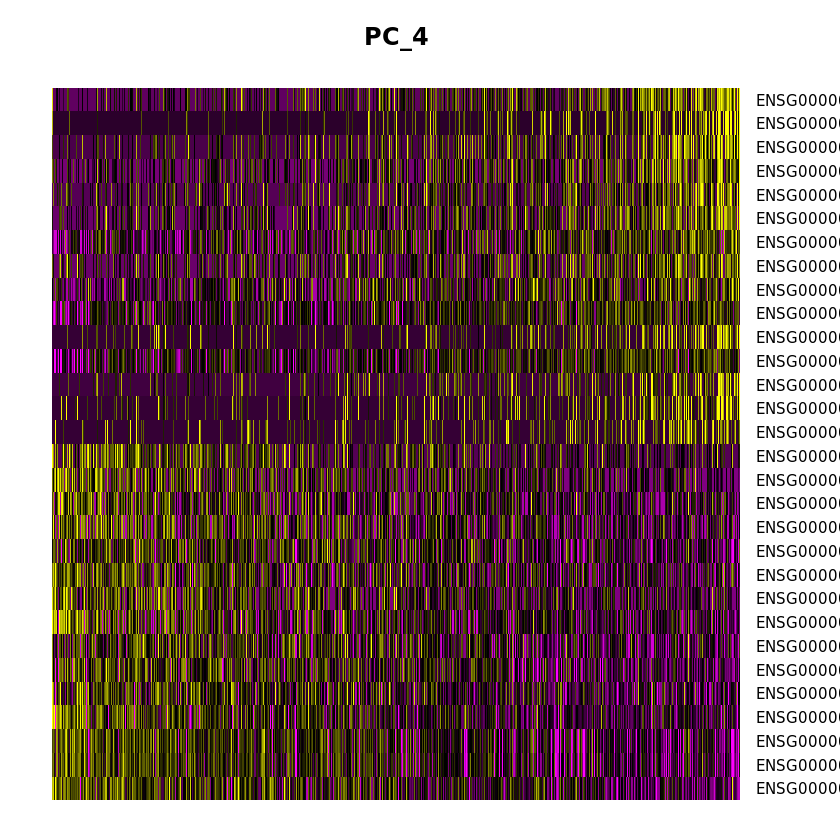

In [11]:
DimHeatmap(gene.expression, dims=4)